In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
univ = pd.read_csv("C:/Users/zeeha/Desktop/qs-world-university-rankings-2017-to-2022-V2.csv")

In [3]:
univ.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [4]:
univ.describe()

,year,score,student_faculty_ratio
count,6482.000000,2820.000000,6407.000000
mean,2019.693613,46.595532,13.264554
std,1.716683,18.813110,6.604294
min,2017.000000,23.500000,1.000000
25%,2018.000000,31.800000,9.000000
50%,2020.000000,40.600000,12.000000
75%,2021.000000,58.025000,17.000000
max,2022.000000,100.000000,67.000000


In [5]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

In [6]:
univ[univ['score'].isnull()].head(100)

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
375,Université Paris Descartes,2017,377,NaN,https://www.topuniversities.com/universities/u...,France,Paris,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,17.0,"11,387",XL,"3,755"
400,Bandung Institute of Technology (ITB),2017,401-410,NaN,https://www.topuniversities.com/universities/b...,Indonesia,Bandung,Asia,https://www.topuniversities.com/sites/default/...,Public,Very High,9.0,613,L,"2,228"
401,Brandeis University,2017,401-410,NaN,https://www.topuniversities.com/universities/b...,United States,Waltham,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,9.0,1.554,M,611
402,Illinois Institute of Technology,2017,401-410,NaN,https://www.topuniversities.com/universities/i...,United States,Chicago,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,15.0,2.330,M,402
403,Johannes Gutenberg Universität Mainz,2017,401-410,NaN,https://www.topuniversities.com/universities/j...,Germany,Mainz,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,9.0,3.605,XL,3.473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,The Catholic University of Korea,2017,491-500,NaN,https://www.topuniversities.com/universities/c...,South Korea,Gyeonggi,Asia,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,370,M,1.668
497,Saint Joseph University of Beirut (USJ),2017,491-500,NaN,https://www.topuniversities.com/universities/s...,Lebanon,Beirut,Asia,https://www.topuniversities.com/sites/default/...,Private,Medium,9.0,955,M,941
498,University of Nebraska - Lincoln,2017,491-500,NaN,https://www.topuniversities.com/universities/u...,United States,Lincoln,North America,https://www.topuniversities.com/sites/default/...,Public,Very High,12.0,2.805,L,1.953
499,University of South Florida,2017,491-500,NaN,https://www.topuniversities.com/universities/u...,United States,Tampa,North America,https://www.topuniversities.com/sites/default/...,Public,Very High,18.0,5.211,XL,2.171


In [7]:
for ind in univ[univ['score'].isnull()].index:
    print(univ['university'][ind]," ", univ['rank_display'][ind], " ",univ['score'][ind])

Université Paris Descartes   377   nan
Bandung Institute of Technology (ITB)   401-410   nan
Brandeis University   401-410   nan
Illinois Institute of Technology   401-410   nan
Johannes Gutenberg Universität Mainz   401-410   nan
National Research Nuclear University MEPhI (Moscow Engineering Physics Institute)   401-410   nan
Taipei Medical University (TMU)   401-410   nan
Universidad Externado de Colombia    401-410   nan
Wake Forest University   401-410   nan
Aix-Marseille University   411-420   nan
Bilkent University   411-420   nan
Sogang University   411-420   nan
Bangor University   411-420   nan
Satbayev University   411-420   nan
National Central University   411-420   nan
HSE University   411-420   nan
Peter the Great St. Petersburg Polytechnic University   411-420   nan
United Arab Emirates University   411-420   nan
Universität Mannheim   411-420   nan
University of Delaware   411-420   nan
University of Oulu   411-420   nan
University of Utah   411-420   nan
Renmin (People

Al-Azhar University   1001   nan
Alexandru Ioan Cuza University   1001   nan
Amity University   1001   nan
An-Najah National University   1001   nan
Aoyama Gakuin University   1001   nan
Assiut University    1001   nan
Azerbaijan State University of Economics   1001   nan
Baku State University   1001   nan
Baylor College of Medicine   nan   nan
Belarusian State University of Informatics and Radioelectronics   1001   nan
Benemérita Universidad Autónoma de Puebla   1001   nan
Birla Institute of Technology and Science, Pilani   1001   nan
Birzeit university   1001   nan
Brigham Young University   1001   nan
Canterbury Christ Church University   1001   nan
Chung Yuan Christian University   1001   nan
Cranfield University   nan   nan
Damascus University   1001   nan
Diponegoro University   1001   nan
Dokuz Eylül Üniversitesi   1001   nan
Doshisha University   1001   nan
Academician Y.A. Buketov Karaganda University   1001   nan
EGE UNIVERSITY   1001   nan
Escuela Superior Politécnica del Li

As we can see from the above output, most of the null values in score has a rank below 400

In [8]:
univ_ref = univ.dropna(subset=['score'])

In [9]:
univ_ref['score'].isnull().sum()

0

In [10]:
univ_ref.shape

(2820, 15)

In [11]:
univ_ref['research_output'].value_counts() , univ_ref['size'].value_counts() 

(Very High    2570
 High          201
 Medium         26
 Very high      20
 Low             3
 Name: research_output, dtype: int64,
 L     1361
 XL     786
 M      520
 S      153
 Name: size, dtype: int64)

In [12]:
univ_ref['research_level'] = np.where(univ_ref['research_output'] == 'Very high', 'Very High',univ_ref['research_output'])

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21828\2361016869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['research_level'] = np.where(univ_ref['research_output'] == 'Very high', 'Very High',univ_ref['research_output'])


In [13]:
univ_ref['research_level'].value_counts() , univ_ref['size'].value_counts() 

(Very High    2590
 High          201
 Medium         26
 Low             3
 Name: research_level, dtype: int64,
 L     1361
 XL     786
 M      520
 S      153
 Name: size, dtype: int64)

In [14]:
univ_ref['faculty_count'].isnull().sum()

28

In [15]:
univ_ref['faculty_count'] = univ_ref['faculty_count'].str.replace(',', '')

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21828\3270043898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['faculty_count'] = univ_ref['faculty_count'].str.replace(',', '')


In [16]:
univ_ref['faculty_count'] = univ_ref['faculty_count'].astype(float)

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21828\1218057993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['faculty_count'] = univ_ref['faculty_count'].astype(float)


In [17]:
univ_ref['international_students'] = univ_ref['international_students'].str.replace(',', '')

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21828\1931790428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['international_students'] = univ_ref['international_students'].str.replace(',', '')


In [18]:
univ_ref['international_students'] = univ_ref['international_students'].astype(float)

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21828\2693779075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['international_students'] = univ_ref['international_students'].astype(float)


In [19]:
univ_ref.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2820 entries, 0 to 5682
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              2820 non-null   object 
 1   year                    2820 non-null   int64  
 2   rank_display            2808 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    2820 non-null   object 
 5   country                 2820 non-null   object 
 6   city                    2757 non-null   object 
 7   region                  2820 non-null   object 
 8   logo                    2820 non-null   object 
 9   type                    2820 non-null   object 
 10  research_output         2820 non-null   object 
 11  student_faculty_ratio   2795 non-null   float64
 12  international_students  2792 non-null   float64
 13  size                    2820 non-null   object 
 14  faculty_count           2792 non-null   

In [22]:
univ_ref['score_bin'] = pd.qcut(univ_ref['score'], q = 10)

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21828\2849643262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['score_bin'] = pd.qcut(univ_ref['score'], q = 10)


In [23]:
univ_ref['num_country'] = pd.Categorical(univ_ref['country']).codes

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21828\4147588862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['num_country'] = pd.Categorical(univ_ref['country']).codes


In [24]:
scale_mapper = {"S":1, "M":2, "L":3, "XL":4}
univ_ref["ord_size"] = univ_ref["size"].replace(scale_mapper)

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21828\2735148544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref["ord_size"] = univ_ref["size"].replace(scale_mapper)


In [25]:
research_mapper = {"Low":1, "Medium":2, "High":3, "Very High":4}
univ_ref["research_num"] = univ_ref["research_level"].replace(research_mapper)

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21828\2877672396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref["research_num"] = univ_ref["research_level"].replace(research_mapper)


In [26]:
univ_ref['research_num'].value_counts() , univ_ref['ord_size'].value_counts() 

(4    2590
 3     201
 2      26
 1       3
 Name: research_num, dtype: int64,
 3    1361
 4     786
 2     520
 1     153
 Name: ord_size, dtype: int64)

In [27]:
univ_ref.isnull().sum()

university                 0
year                       0
rank_display              12
score                      0
link                       0
country                    0
city                      63
region                     0
logo                       0
type                       0
research_output            0
student_faculty_ratio     25
international_students    28
size                       0
faculty_count             28
research_level             0
score_bin                  0
num_country                0
ord_size                   0
research_num               0
dtype: int64

In [28]:
mean_student_faculty_ratio = univ_ref['student_faculty_ratio'].mean()
univ_ref['student_faculty_ratio'].fillna(value=mean_student_faculty_ratio, inplace = True)

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21828\2059552814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['student_faculty_ratio'].fillna(value=mean_student_faculty_ratio, inplace = True)


In [29]:
mean_faculty_count = univ_ref['faculty_count'].mean()
univ_ref['faculty_count'].fillna(value=mean_faculty_count, inplace = True)

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21828\1483519525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['faculty_count'].fillna(value=mean_faculty_count, inplace = True)


In [30]:
mean_international_student = univ_ref['international_students'].mean()
univ_ref['international_students'].fillna(value=mean_international_student, inplace = True)

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21828\1624740501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_ref['international_students'].fillna(value=mean_international_student, inplace = True)


In [31]:
univ_ref.isnull().sum()

university                 0
year                       0
rank_display              12
score                      0
link                       0
country                    0
city                      63
region                     0
logo                       0
type                       0
research_output            0
student_faculty_ratio      0
international_students     0
size                       0
faculty_count              0
research_level             0
score_bin                  0
num_country                0
ord_size                   0
research_num               0
dtype: int64

In [32]:
X_cols = ['num_country', 'research_num', 'student_faculty_ratio', 'international_students', 'ord_size', 'faculty_count']
X = univ_ref[X_cols].to_numpy()
X

array([[6.0000e+01, 4.0000e+00, 4.0000e+00, 3.7300e+03, 2.0000e+00,
        3.0650e+03],
       [6.0000e+01, 4.0000e+00, 3.0000e+00, 3.8790e+03, 3.0000e+00,
        4.7250e+03],
       [6.0000e+01, 4.0000e+00, 5.0000e+00, 5.8770e+03, 3.0000e+00,
        4.6460e+03],
       ...,
       [5.0000e+01, 4.0000e+00, 9.0000e+00, 1.4290e+00, 2.0000e+00,
        1.0170e+00],
       [2.8000e+01, 4.0000e+00, 1.7000e+01, 3.5050e+00, 3.0000e+00,
        1.4460e+00],
       [7.0000e+00, 4.0000e+00, 2.9000e+01, 1.2285e+01, 4.0000e+00,
        1.5080e+00]])

In [33]:
y = univ_ref['score'].to_numpy()
y

array([100. ,  98.7,  98.3, ...,  24.1,  24.1,  24.1])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [35]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((2256, 6), (2256,), (564, 6), (564,))

In [36]:
X_train

array([[2.800e+01, 4.000e+00, 1.300e+01, 7.380e+02, 3.000e+00, 1.066e+00],
       [5.200e+01, 4.000e+00, 8.000e+00, 5.652e+03, 3.000e+00, 2.680e+03],
       [6.000e+01, 4.000e+00, 7.000e+00, 4.143e+03, 4.000e+00, 6.222e+03],
       ...,
       [6.000e+01, 4.000e+00, 1.500e+01, 5.795e+03, 4.000e+00, 3.008e+03],
       [3.600e+01, 4.000e+00, 5.000e+00, 4.131e+03, 3.000e+00, 2.767e+03],
       [6.000e+01, 4.000e+00, 5.000e+00, 3.846e+03, 3.000e+00, 3.652e+03]])

In [37]:
regressor = RandomForestRegressor(n_estimators=40, random_state=0)

In [38]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40, random_state=0)

In [39]:
regressor.score(X_train, y_train)

0.9825981108488805

In [40]:
predictions = regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

print("Accuracy:", regressor.score(X_test, y_test))

Mean Squared Error: 12.079880641737876
Accuracy: 0.9652418197566686


In [41]:
importances = regressor.feature_importances_

# Print the feature importances
print(importances)
print(X_cols)

[0.06377486 0.01080702 0.13892431 0.53189973 0.03240924 0.22218483]
['num_country', 'research_num', 'student_faculty_ratio', 'international_students', 'ord_size', 'faculty_count']


In [42]:
feature_imp = np.stack((X_cols, importances * 100), axis=1)

In [43]:
index_values = np.arange(0,6)
feature_imp_df = pd.DataFrame(data = feature_imp, index = index_values, columns = ['Features', 'Importance'])

In [44]:
feature_imp_df.head()

,Features,Importance
0,num_country,6.377486336391988
1,research_num,1.0807015582489061
2,student_faculty_ratio,13.892431025027568
3,international_students,53.189973484387885
4,ord_size,3.2409242463330505


In [45]:
feature_imp_df['Importance'] = feature_imp_df['Importance'].astype(float)

In [46]:
feature_imp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Features    6 non-null      object 
 1   Importance  6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 144.0+ bytes


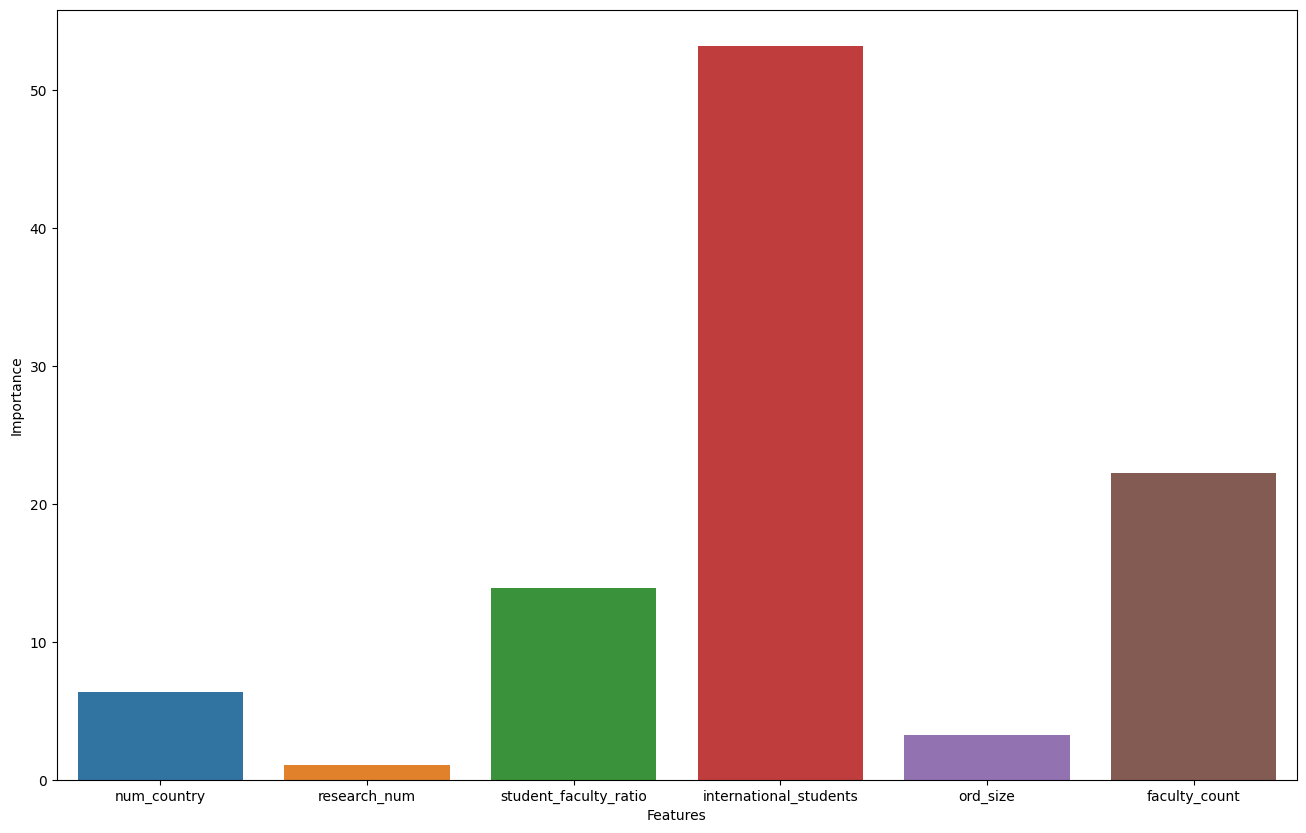

In [47]:
fig, ax = plt.subplots(figsize=(16, 10))
barplot = sns.barplot(feature_imp_df, x = "Features", y = "Importance", ax = ax)

In [48]:
figure = barplot.get_figure()
figure.savefig("feautre_importance.png") 